In [ ]:
#hi

In [ ]:
!unzip "/content/thermal dogs and people.v2-release.yolov8.zip"

Archive:  /content/thermal dogs and people.v2-release.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_0002-4_jpg.rf.760e51323edd9cf3800edb9f494c5204.jpg  
 extracting: test/images/IMG_0006-5_jpg.rf.3028f38294409a3dcea433e494c54a3a.jpg  
 extracting: test/images/IMG_0009_jpg.rf.6e59f07ca91232fc85e935976f325bd0.jpg  
 extracting: test/images/IMG_0012-2_jpg.rf.3d8fa4cd318dd03c9bcb4b041146063b.jpg  
 extracting: test/images/IMG_0022_jpg.rf.8d3be5e1c44620a8cc9a1605ce18d6b6.jpg  
 extracting: test/images/IMG_0023-3_jpg.rf.ab6108527fdd9aad861001417885d713.jpg  
 extracting: test/images/IMG_0024-2_jpg.rf.9eb943d8a0f67282cbabfec5241ec387.jpg  
 extracting: test/images/IMG_0027_jpg.rf.47486b1f46a03ae4892c040a629fd671.jpg  
 extracting: test/images/IMG_0031-2_jpg.rf.9fdb2675393c1741b3803c1a3d9df696.jpg  
 extracting: test/images/IMG_0033-2_jpg.rf.0

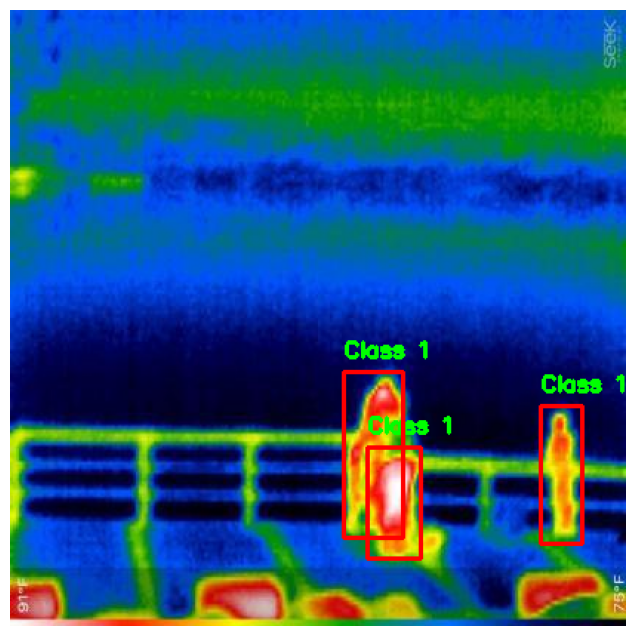

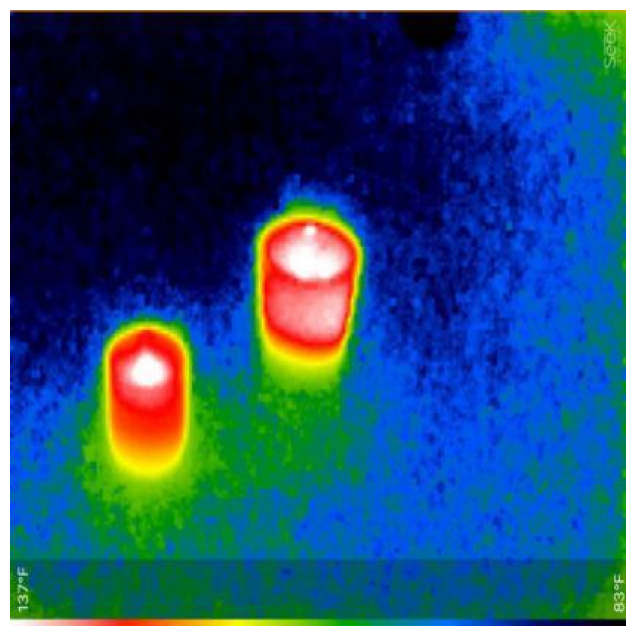

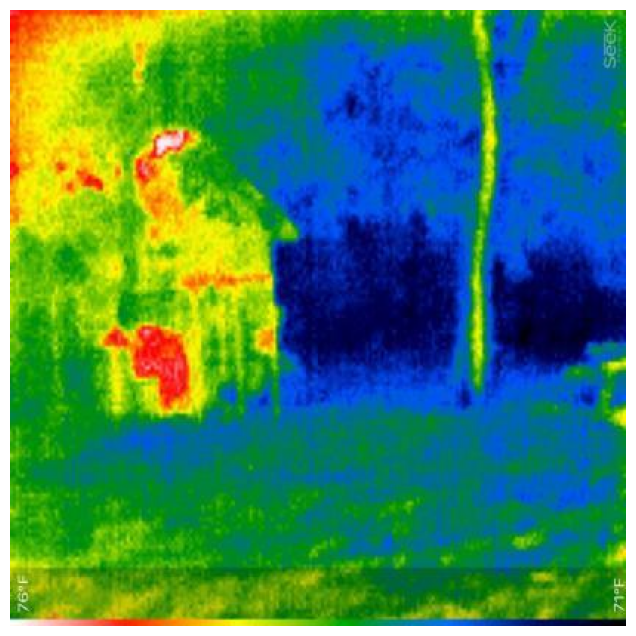

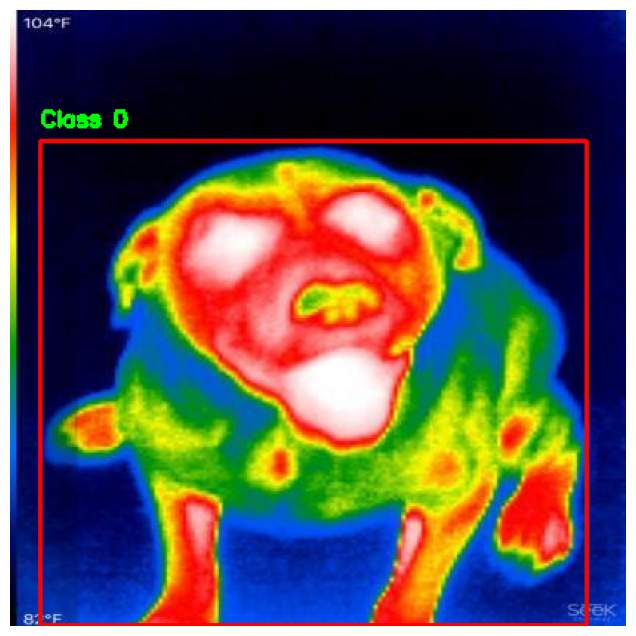

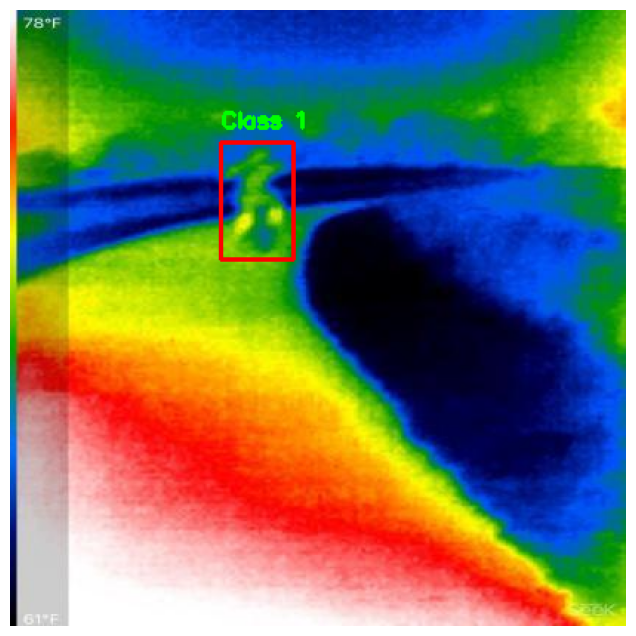

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def load_annotations(label_path):
    boxes = []
    with open(label_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, data)
            boxes.append((class_id, x_center, y_center, width, height))
    return boxes

def plot_images_with_bboxes(img_folder, label_folder, num_images=5):
    image_files = sorted(os.listdir(img_folder))[:num_images]
    for image_file in image_files:
        img_path = os.path.join(img_folder, image_file)
        label_path = os.path.join(label_folder, image_file.replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        height, width, _ = img.shape

        if os.path.exists(label_path):
            boxes = load_annotations(label_path)
            for box in boxes:
                class_id, x_center, y_center, box_width, box_height = box
                x_min = int((x_center - box_width / 2) * width)
                y_min = int((y_center - box_height / 2) * height)
                x_max = int((x_center + box_width / 2) * width)
                y_max = int((y_center + box_height / 2) * height)

                cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

                label_text = f"Class {int(class_id)}"
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(img, label_text, (x_min, y_min - 10), font, 0.5, (0, 255, 0), 2)

        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    img_folder = './datasets/train/images'
    label_folder = './datasets/train/labels'

    plot_images_with_bboxes(img_folder, label_folder, num_images=5)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 23.2 MB/s eta 0:00:00


# test

In [ ]:
from ultralytics import YOLO
import cv2
import os
from pathlib import Path

def run_inference():
    model = YOLO('best.pt')
    test_dir = Path('/content/datasets/test/images')
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
    image_files = [f for f in test_dir.glob('*') if f.suffix.lower() in image_extensions]

    print(f"Found {len(image_files)} images in the test directory")

    for img_path in image_files:
        results = model(str(img_path))
        result = results[0]
        img = cv2.imread(str(img_path))

        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = result.names[int(box.cls[0])]

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f'{cls} {conf:.2f}'
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        output_path = str(f'annotated_{img_path.name}')
        cv2.imwrite(output_path, img)
        print(f"Processed and saved: {output_path}")

if __name__ == "__main__":
    run_inference()


Found 20 images in the test directory

image 1/1 /content/datasets/test/images/IMG_0024-2_jpg.rf.9eb943d8a0f67282cbabfec5241ec387.jpg: 640x640 2 persons, 7.5ms
Speed: 11.8ms preprocess, 7.5ms inference, 780.5ms postprocess per image at shape (1, 3, 640, 640)
Processed and saved: /content/datasets/test/images/annotated_IMG_0024-2_jpg.rf.9eb943d8a0f67282cbabfec5241ec387.jpg

image 1/1 /content/datasets/test/images/IMG_0012-2_jpg.rf.3d8fa4cd318dd03c9bcb4b041146063b.jpg: 640x640 2 persons, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Processed and saved: /content/datasets/test/images/annotated_IMG_0012-2_jpg.rf.3d8fa4cd318dd03c9bcb4b041146063b.jpg

image 1/1 /content/datasets/test/images/IMG_0033-2_jpg.rf.06c7e6b4b383bef74ef0638939d58354.jpg: 640x640 1 person, 7.6ms
Speed: 2.3ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Processed and saved: /content/datasets/test/images/annotated_IMG_0033-2_jp

# train

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

training_params = {
    "data": "datasets/data.yaml",
    "epochs": 50,
    "batch": 16,
    "imgsz": 640,
    "patience": 20,
    "save_period": 5
}

model.train(**training_params)


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

train: Scanning /content/datasets/train/labels.cache... 142 images, 11 backgrounds, 0 corrupt: 100%|██████████| 142/142 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/valid/labels.cache... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train3/weights/best.pt")

training_params = {
    "data": "datasets/data.yaml",
    "epochs": 23,
    "batch": 16,
    "imgsz": 640,
    "patience": 20
}

model.train(**training_params)


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/best.pt, data=datasets/data.yaml, epochs=23, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /content/datasets/train/labels.cache... 142 images, 11 backgrounds, 0 corrupt: 100%|██████████| 142/142 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/valid/labels.cache... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 23 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/23      2.31G     0.8131     0.7728      1.178         28        640: 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         41         49      0.968      0.979      0.991      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/23      2.18G     0.6974     0.7374      1.106         36        640: 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         41         49      0.984      0.996      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/23      2.18G     0.7312     0.7122      1.099         37        640: 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         41         49       0.99      0.981      0.994      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/23      2.18G     0.7217     0.7057      1.106         38        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         41         49      0.969      0.926      0.983      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/23      2.18G     0.7767     0.7451      1.112         39        640: 100%|██████████| 9/9 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         41         49      0.949       0.92      0.975      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/23      2.18G     0.7325     0.7234      1.104         24        640: 100%|██████████| 9/9 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         41         49      0.909      0.915       0.97      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/23      2.18G     0.7662     0.7196      1.121         42        640: 100%|██████████| 9/9 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         41         49      0.997      0.936      0.988      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/23      2.18G     0.7351     0.7299      1.105         32        640: 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         41         49      0.986       0.98      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/23      2.18G     0.7158     0.6838       1.09         25        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         41         49      0.937      0.933      0.984      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/23      2.19G     0.7043     0.7225      1.083         26        640: 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         41         49      0.952      0.906      0.975      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/23      2.19G     0.7454     0.6998      1.098         35        640: 100%|██████████| 9/9 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         41         49      0.938      0.818      0.955      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/23      2.18G     0.8215     0.7981      1.132         36        640: 100%|██████████| 9/9 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         41         49      0.988      0.862      0.969      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/23      2.18G     0.8114     0.7464      1.114         39        640: 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         41         49      0.975      0.862      0.952      0.729


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/23      2.18G     0.6764     0.7192      1.075         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         41         49      0.994      0.862      0.957      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/23      2.18G     0.5816     0.6223     0.9869         19        640: 100%|██████████| 9/9 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         41         49      0.992       0.86      0.958      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/23      2.18G     0.6223      0.612      1.034         18        640: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         41         49      0.993      0.933      0.975      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/23      2.18G     0.5777     0.5609      1.003         14        640: 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         41         49      0.995      0.933      0.982      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/23      2.18G     0.5857     0.5667      1.005         17        640: 100%|██████████| 9/9 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         41         49      0.994      0.934      0.987      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/23      2.18G     0.5715     0.5557       1.01         18        640: 100%|██████████| 9/9 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         41         49          1      0.962      0.993      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/23      2.18G      0.538     0.5195     0.9595         17        640: 100%|██████████| 9/9 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         41         49      0.988      0.972      0.994      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/23      2.18G     0.5492     0.5556     0.9847         15        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         41         49      0.974      0.997      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/23      2.18G      0.515     0.4921     0.9838         18        640: 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         41         49      0.993      0.981      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/23      2.18G     0.5195     0.4956     0.9775         14        640: 100%|██████████| 9/9 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         41         49       0.99      0.981      0.994      0.852



23 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


                   all         41         49      0.991      0.981      0.994      0.852
                   dog         22         22      0.992          1      0.995      0.919
                person         19         27      0.989      0.963      0.994      0.786
Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c1d976ef370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train3/weights/best.pt")

results = model.track(source="/content/vid1_cut.mp4", show=True, save=True, save_txt=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/465) /content/vid1_cut.mp4: 384x640 1 person, 9.9ms
video 1/1 (frame 2/465) /content/vid1_cut.mp4: 384x640 1 person, 8.0ms
video 1/1 (frame 3/465) /content/vid1_cut.mp4: 384x640 1 person, 6.4ms
video 1/1 (frame 4/465) /content/vid1_cut.mp4: 384x640 1 person, 7.1ms
video 1/1 (frame 5/465) /content/vid1_cut.mp4: 384x640 1 person, 6.5ms
video 1/1 (frame 6/465) /co